# COVID-19 self-testing and Bayesian theorem 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from matplotlib.pyplot import MultipleLocator

### 1. 

There's no infection but shows positive ==> Type I (False positive):  1%    
There's infection but shows negative ==> Type II (False negative):  40%  

### 2. 

From Bayesian theorem, the formula of being healthy but getting a positive test is
$$P(healthy|+) = \frac{P(+|healthy) P(healthy)}{P(sick)P(+|sick) + P(healthy)P(+|healthy)},$$

and being healthy and getting a negative test is
$$P(healthy|-) = \frac{P(-|healthy) P(healthy)}{P(sick)P(-|sick) + P(healthy)P(-|healthy)}.$$

The numbers are given: 
$$P(+|healthy) = 0.01, P(-|healthy) = 0.99, P(+|sick) = 0.6 and P(-|sick) = 0.4$$

In [15]:
h_pos = 0.01
h_neg = 0.99
s_pos = 0.6
s_neg = 0.4

# make a bayesian probability function of being healthy but postive
def pos_h(sick):
    result = (h_pos*(1-sick))/(sick*s_pos+(1-sick)*h_pos)
    return result

# make a bayesian probability function of being healthy and negative
def neg_h(sick):
    result = (h_neg*(1-sick))/(sick*s_neg+(1-sick)*h_neg)
    return result

# make a bayesian probability function of being sick and positive
def pos_s(sick):
    result = (s_pos*sick)/(sick*s_pos+(1-sick)*h_pos)
    return result

In [32]:
x = np.linspace(1e-6, 1, 1000)

In [33]:
pos_healthy_list = []
neg_healthy_list = []

for xi in list(x):
    pos_healthy = pos_h(xi)
    pos_healthy_list.append(pos_healthy)
    neg_healthy = neg_h(xi)
    neg_healthy_list.append(neg_healthy)

In [34]:
pos_h_array = np.array(pos_healthy_list)
neg_h_array = np.array(neg_healthy_list)

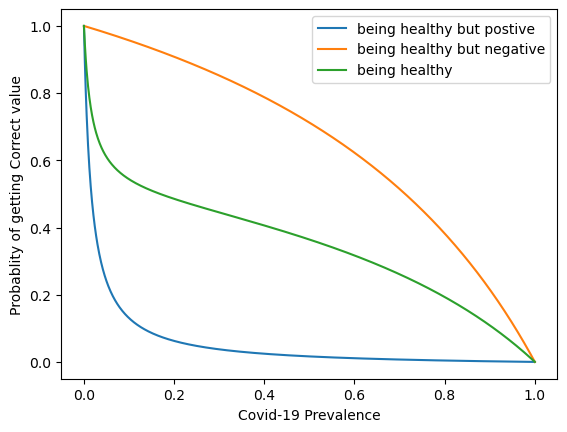

In [50]:
plt.plot(x, pos_h_array, label = "being healthy but postive")
plt.plot(x, neg_h_array, label = "being healthy but negative")
plt.plot(x, (pos_h_array+neg_h_array)/2, label = "being healthy")

plt.xlabel("Covid-19 Prevalence")
plt.ylabel("Probablity of getting Correct value")
plt.legend()
plt.show()

Make a function of being healthy to see if the graph above is true

In [61]:
# make a bayesian probability function of being healthy
def h(sick):
    result1 = (h_neg*(1-sick))/(sick*s_neg+(1-sick)*h_neg)
    result2 = (h_pos*(1-sick))/(sick*s_pos+(1-sick)*h_pos)
    result = (result1+result2)/2
    return result

In [62]:
x = np.linspace(1e-6, 1, 1000)

In [63]:
healthy_list = []

for xi in list(x):
    healthy = h(xi)
    healthy_list.append(healthy)

In [64]:
h_array = np.array(healthy_list)

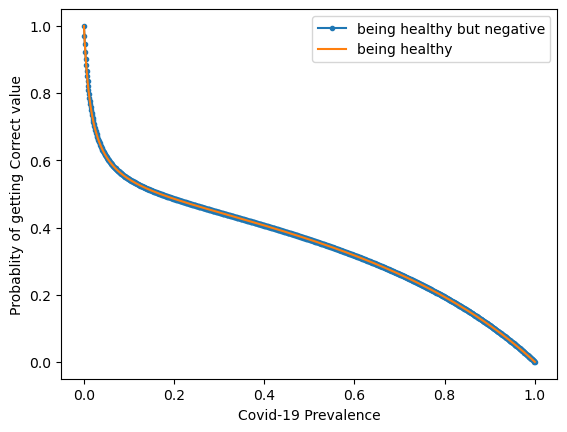

In [65]:
plt.plot(x, h_array, marker = '.', label = "being healthy but negative")
plt.plot(x, (pos_h_array+neg_h_array)/2, label = "being healthy")

plt.xlabel("Covid-19 Prevalence")
plt.ylabel("Probablity of getting Correct value")
plt.legend()
plt.show()

### If someone does Covid-19 test, how many "positive" he needs to make sure he really get Covid?

In [51]:
# this is covid prevalence in the general population
prior = 1e-6
corr_prob = [1e-6,]
x = [0,]

# repeat the test for 20 times
for i in range(20):
    if i ==0:
        p = pos_s(prior)
    if i !=0:
        p = pos_s(p)
    corr_prob.append(p)
    x.append(i+1)

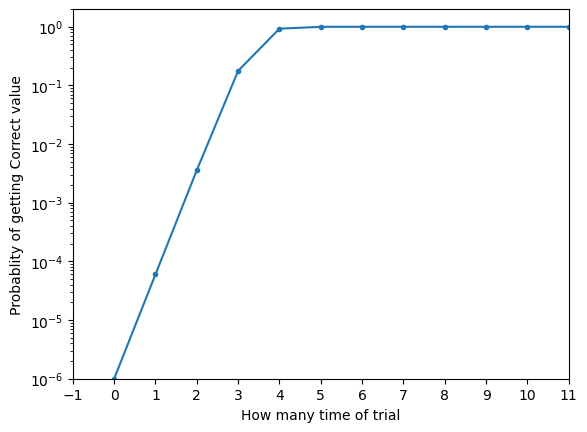

In [52]:
xlocator = MultipleLocator(1)

plt.plot(np.array(x), np.array(corr_prob), marker = '.')
plt.ylim([1e-6, 2])
plt.xlim([-1, 11])
plt.xlabel("How many time of trial")
plt.ylabel("Probablity of getting Correct value")
plt.yscale('log')
ax = plt.gca()
ax.xaxis.set_major_locator(xlocator)
plt.show()